In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [19]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


# Training Set vs. Test Set

As with most machine learning algorithms, we have to split our dataset into:

- **Training set:** the data used to fit the model

- **Test set:** the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

![image.png](https://content.codecademy.com/programs/machine-learning/multiple-linear-regression/split.svg)

In [6]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 6)
print(f'x_train: {x_train.shape}, x_test: {x_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

x_train: (2831, 14), x_test: (708, 14), y_train: (2831, 1), y_test: (708, 1)


# Multiple Linear Regression: Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [10]:
y_predict = mlr.predict(x_test)

In [11]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [20]:
predict = mlr.predict(sonny_apartment)
 
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


# Visualizing Results with Matplotlib

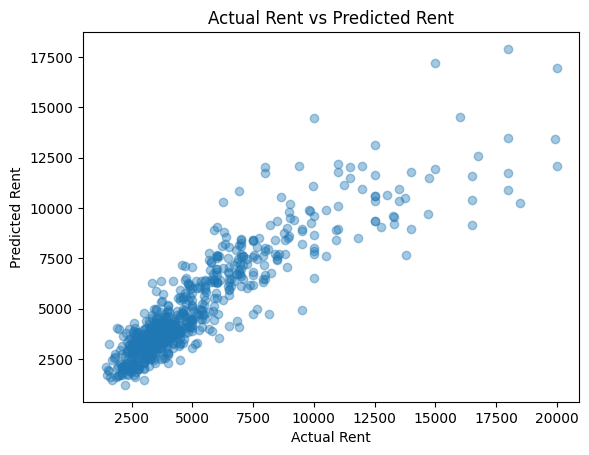

In [25]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual Rent vs Predicted Rent')
plt.show()

In [26]:
mlr.score(x_train, y_train)

0.7725460559817883

In [37]:
x.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [27]:
mlr.coef_

array([[-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
          24.19824177,   -7.58272473, -140.90664773,   48.85017415,
         191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
         -19.31948556,  -38.92369828]])

Los coeficientes son más útiles para determinar qué variable independiente tiene más peso. Por ejemplo, un coeficiente de -1,345 afectará a la renta más que un coeficiente de 0,238, afectando el primero negativamente a los precios y positivamente el segundo.

In [28]:
mlr.intercept_

array([-344.68587986])

# Correlations

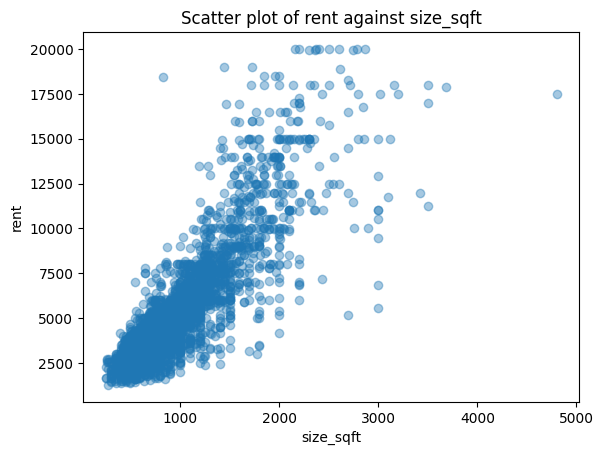

In [30]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=.4)
plt.title('Scatter plot of rent against size_sqft')
plt.xlabel('size_sqft')
plt.ylabel('rent')
plt.show()

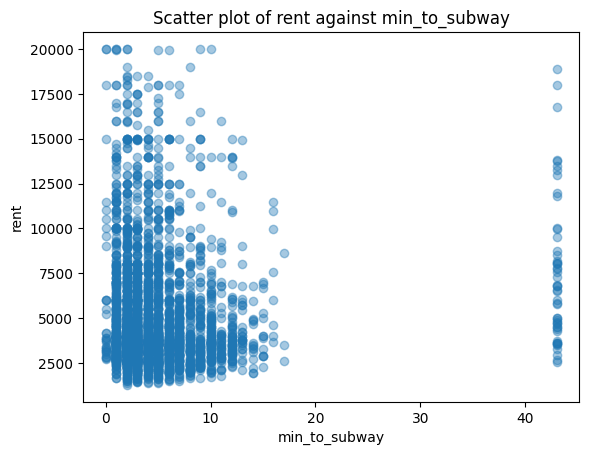

In [32]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=.4)
plt.title('Scatter plot of rent against min_to_subway')
plt.xlabel('min_to_subway')
plt.ylabel('rent')
plt.show()

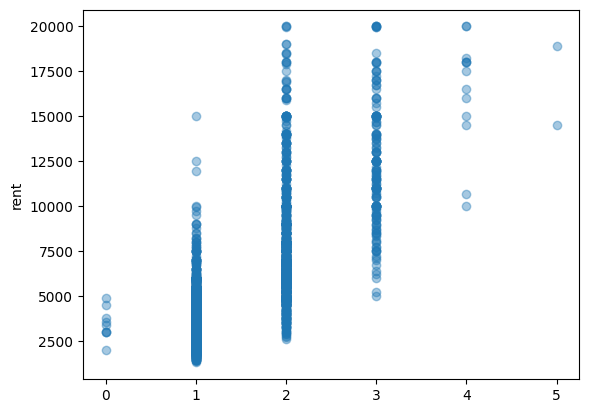

In [49]:
plt.scatter(df[['bathrooms']], df[['rent']], alpha=.4)
plt.ylabel('rent')
plt.show()

In [41]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [46]:
ols_model = ols(formula=f'rent ~ {" + ".join(x.columns)}', data=pd.concat([x_train, y_train], axis=1))
ols_model_fit = ols_model.fit()
ols_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     683.2
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:27:01   Log-Likelihood:                -24748.
No. Observations:                2831   AIC:                         4.953e+04
Df Residuals:                    2816   BIC:                         4.962e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -344.6859    108.922     -3.165      0.002    -558.261    -131.111
bedrooms          -302.7301     48.757     -6.209      0.000    -398.333    -207.127
bathrooms         1199.3860     84.067     14.267      0.000    1034.547    1364.225
size_sqft            4.7998      0.113     42.319      0.000       4.577       5.022
min_to_subway      -24.2899      5.542     -4.383      0.000     -35.157     -13.423
floor               24.1982      2.866      8.443      0.000      18.578      29.818
building_age_yrs    -7.5827      0.831     -9.127      0.000      -9.212      -5.954
no_fee            -140.9066     61.865     -2.278      0.023    -262.212     -19.601
has_roofdeck        48.8502     99.967      0.489      0.625    -147.166     244.866
has_washer_dryer   191.4257     90.057      2.126      0.034      14.842     368.009
has_doorman       -151.1145     96.880     -1.560      0.119    -341.078      38.849
has_elevator        89.4089     98.142      0.911      0.362    -103.029     281.847
has_dishwasher     -57.8971     86.934     -0.666      0.505    -228.359     112.564
has_patio          -19.3195    128.548     -0.150      0.881    -271.378     232.739
has_gym            -38.9237    109.936     -0.354      0.723    -254.488     176.640
==============================================================================
Omnibus:                      799.057   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8069.625
Skew:                           1.040   Prob(JB):                         0.00
Kurtosis:                      11.005   Cond. No.                     4.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Evaluating the Model's Accuracy

- **$R^2$** (R-squared) formula: $R^2 = 1 - \frac{(y - \hat{y})^2}{(y - \bar{y})^2}$

In [50]:
print(f'Train score: {mlr.score(x_train, y_train)}')
print(f'Test score: {mlr.score(x_test, y_test)}')

Train score: 0.7725460559817883
Test score: 0.8050371975357623


# Rebuild the Model

In [56]:
x = df[['size_sqft', 'building_age_yrs', 'bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 6)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

print(f'Train score: {mlr.score(x_train, y_train)}')
print(f'Test score: {mlr.score(x_test, y_test)}')

Train score: 0.7719381795484013
Test score: 0.8052134338903536


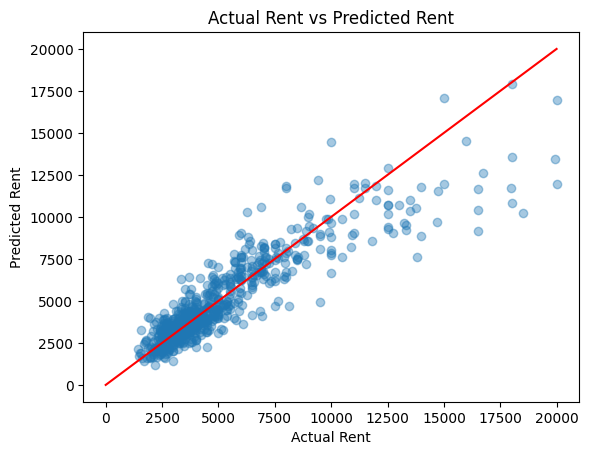

In [58]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.plot(range(20000), range(20000), color='red')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual Rent vs Predicted Rent')
plt.show()